# Use this package

In [6]:
import news_sentiment
import datetime as dt
summary = news_sentiment.get_daily_sentiment_series("FB", 
    start_date=dt.date(2022, 1, 1), lim=400)

In [7]:
summary.head(5)

title_sentiment                  content_sentiment           \
                  positive negative neutral          positive negative   
2022-01-03             NaN      NaN     NaN               NaN      NaN   
2022-01-04             NaN      NaN     NaN               NaN      NaN   
2022-01-05             NaN      NaN     NaN               NaN      NaN   
2022-01-06             NaN      NaN     NaN               NaN      NaN   
2022-01-07             NaN      NaN     NaN               NaN      NaN   

                   news_count    price                                       \
           neutral      count     open      high       low   close adjClose   
2022-01-03     NaN        NaN  338.295  341.0816  337.1900  338.54   338.54   
2022-01-04     NaN        NaN  339.950  343.0900  331.8700  336.53   336.53   
2022-01-05     NaN        NaN  333.020  335.7600  323.8600  324.17   324.17   
2022-01-06     NaN        NaN  322.820  339.1700  322.7200  332.46   332.46   
2022-01-07     NaN        NaN  332.740  336.9700  328.8801  331.79   331.79   

                                                                         \
                volume unadjustedVolume change changePercent       vwap   
2022-01-03  14563294.0       14563294.0  0.245         0.072  338.93720   
2022-01-04  15989000.0       15989000.0 -3.420        -1.006  337.16333   
2022-01-05  20267868.0       20267868.0 -8.850        -2.657  327.93000   
2022-01-06  27948072.0       27948072.0  9.640         2.986  331.45000   
2022-01-07  14722959.0       14722959.0 -0.950        -0.286  332.54670   

                           
           changeOverTime  
2022-01-03        0.00072  
2022-01-04       -0.01006  
2022-01-05       -0.02657  
2022-01-06        0.02986  
2022-01-07       -0.00286

In [8]:
summary.corr()

title_sentiment                      \
                                          positive  negative   neutral   
title_sentiment   positive                1.000000 -0.333192 -0.475068   
                  negative               -0.333192  1.000000 -0.671379   
                  neutral                -0.475068 -0.671379  1.000000   
content_sentiment positive                0.281469 -0.272264  0.032856   
                  negative               -0.066366  0.457062 -0.374400   
                  neutral                -0.111366 -0.300822  0.368287   
news_count        count                  -0.019991  0.166405 -0.139588   
price             open                    0.075471  0.150496 -0.190386   
                  high                    0.044350  0.130317 -0.151746   
                  low                     0.036488  0.076962 -0.096046   
                  close                   0.016049  0.039750 -0.047860   
                  adjClose                0.016049  0.039750 -0.047860   
                  volume                  0.382680  0.012779 -0.251095   
                  unadjustedVolume        0.382680  0.012779 -0.251095   
                  change                 -0.116026 -0.215436  0.277527   
                  changePercent          -0.132395 -0.215664  0.287964   
                  vwap                    0.032752  0.084051 -0.100462   
                  changeOverTime         -0.132395 -0.215664  0.287964   

                                   content_sentiment                      \
                                            positive  negative   neutral   
title_sentiment   positive                  0.281469 -0.066366 -0.111366   
                  negative                 -0.272264  0.457062 -0.300822   
                  neutral                   0.032856 -0.374400  0.368287   
content_sentiment positive                  1.000000 -0.369209 -0.256909   
                  negative                 -0.369209  1.000000 -0.803301   
                  neutral                  -0.256909 -0.803301  1.000000   
news_count        count                     0.020519  0.035050 -0.049599   
price             open                      0.183615  0.232178 -0.348048   
                  high                      0.227828  0.125302 -0.257546   
                  low                       0.184180  0.151848 -0.262336   
                  close                     0.241438  0.062958 -0.198158   
                  adjClose                  0.241438  0.062958 -0.198158   
                  volume                    0.383225  0.005857 -0.213793   
                  unadjustedVolume          0.383225  0.005857 -0.213793   
                  change                    0.133904 -0.329006  0.279791   
                  changePercent             0.127348 -0.321527  0.275333   
                  vwap                      0.222483  0.114149 -0.242709   
                  changeOverTime            0.127348 -0.321527  0.275333   

                                   news_count     price                      \
                                        count      open      high       low   
title_sentiment   positive          -0.019991  0.075471  0.044350  0.036488   
                  negative           0.166405  0.150496  0.130317  0.076962   
                  neutral           -0.139588 -0.190386 -0.151746 -0.096046   
content_sentiment positive           0.020519  0.183615  0.227828  0.184180   
                  negative           0.035050  0.232178  0.125302  0.151848   
                  neutral           -0.049599 -0.348048 -0.257546 -0.262336   
news_count        count              1.000000 -0.140790 -0.098267 -0.183412   
price             open              -0.140790  1.000000  0.997452  0.997065   
                  high              -0.098267  0.997452  1.000000  0.997531   
                  low               -0.183412  0.997065  0.997531  1.000000   
                  close             -0.087601  0.992222  0.996801  0.996925   
      

## Visualize sentiment

[Text(0, 0.5, 'avg softmax'), Text(0.5, 1.0, 'FB sentiment')]

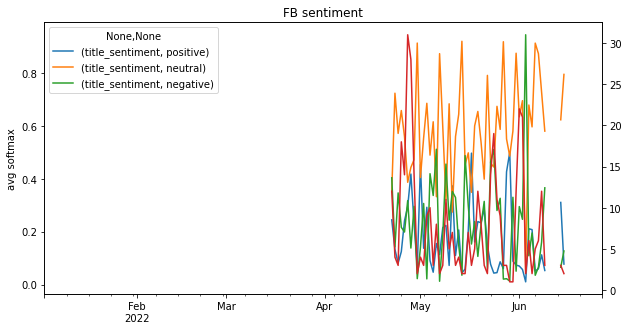

In [10]:
import matplotlib.pyplot as plt
import itertools
f, ax = plt.subplots(1, figsize=(10,5))
summary.loc[:, itertools.product(["title_sentiment"], 
    ["positive", "neutral", "negative"])].plot(ax=ax)
summary.loc[:, ("news_count", "count")].plot(ax=ax, secondary_y=True, label="news count")
ax.set(ylabel="avg softmax",
    title="FB sentiment")

## Check correlation

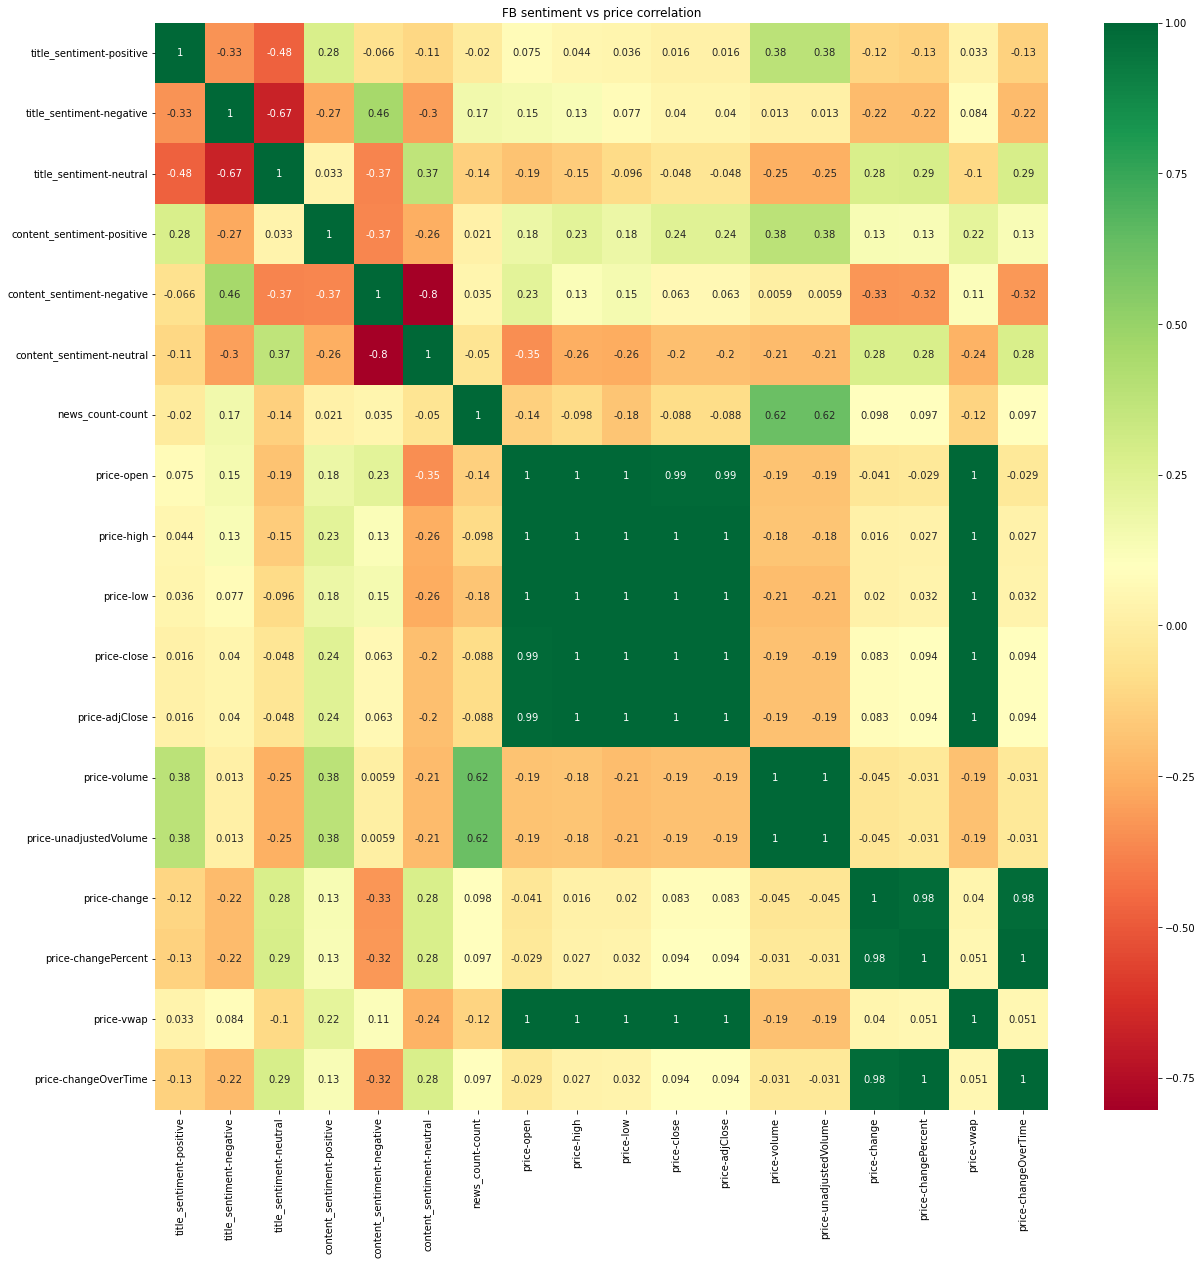

In [14]:
import seaborn as sns
f, ax = plt.subplots(1, figsize=(20, 20))
sns.heatmap(summary.corr(), annot=True, ax=ax, cmap="RdYlGn")
ax.set(title="FB sentiment vs price correlation")
ax.set(xlabel=None, ylabel=None)
plt.show()